In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from fastprogress import master_bar, progress_bar
%matplotlib inline

In [2]:
ls

createCsv.py      features/         index.ipynb       nikkei_index.csv


In [3]:
df = pd.read_csv('nikkei_index.csv')

In [4]:
df.head()

,date,opening,high,low,ending
0,2007-01-04 00:00:00,17322.50,17379.46,17315.75,17353.66
1,2007-01-05 00:00:00,17315.53,17327.13,17011.09,17091.58
2,2007-01-09 00:00:00,17018.89,17261.02,16983.97,17237.76
3,2007-01-10 00:00:00,17192.41,17199.41,16847.57,16942.40
4,2007-01-11 00:00:00,16958.57,17057.44,16758.46,16838.16


In [5]:
len(df)

2620

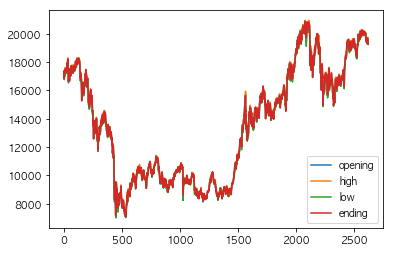

In [6]:
df.plot()

In [7]:
df['date'] = pd.to_datetime(df['date'])

from datetime import date, timedelta

base = df['date'][0]
date_time = []

for i in range(len(df)):
    date_time.append(base + timedelta(days = i))
    
df['date'] = date_time

In [8]:
df.head()

,date,opening,high,low,ending
0,2007-01-04,17322.50,17379.46,17315.75,17353.66
1,2007-01-05,17315.53,17327.13,17011.09,17091.58
2,2007-01-06,17018.89,17261.02,16983.97,17237.76
3,2007-01-07,17192.41,17199.41,16847.57,16942.40
4,2007-01-08,16958.57,17057.44,16758.46,16838.16


In [9]:
X = df[['date', 'ending']]
y = df['ending']

X_train = X[:2600]
y_train = y[:2600]
X_test = X[2600:].reset_index(drop=True)
y_test = y[2600:].reset_index(drop=True)

In [10]:
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train.drop(['date', 'ending'], axis=1, inplace=True)

X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test.drop(['date', 'ending'], axis=1, inplace=True)

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [11]:
X_valid = X_train[2580:].reset_index(drop=True)
y_valid = y_train[2580:].reset_index(drop=True)
X_train2 = X_train[:2580]
y_train2 = y_train[:2580]

In [12]:
X_train.head()

,year,month,day
0,2007,1,4
1,2007,1,5
2,2007,1,6
3,2007,1,7
4,2007,1,8


In [13]:
y_valid

0     20099.81
1     20118.86
2     19999.91
3     20020.86
4     20144.59
5     20099.75
6     19975.67
7     19955.20
8     20050.16
9     20079.64
10    19959.84
11    19925.18
12    19985.79
13    20080.04
14    20029.26
15    19952.33
16    20055.89
17    19996.01
18    19738.71
19    19729.74
Name: ending, dtype: float64

In [14]:
X_valid.head()

,year,month,day
0,2014,1,27
1,2014,1,28
2,2014,1,29
3,2014,1,30
4,2014,1,31


In [15]:
import lightgbm as lgb

lgbm_params = {
    'learning_rate': 0.1,
    'num_leaves': 8,
    'boosting_type' : 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
}

def lgbm_train(X_train_df, X_valid_df, y_train_df, y_valid_df, lgbm_params):
    lgb_train = lgb.Dataset(X_train_df, y_train_df)
    lgb_eval = lgb.Dataset(X_valid_df, y_valid_df, reference=lgb_train)

    # 上記のパラメータでモデルを学習する
    model = lgb.train(lgbm_params, lgb_train,
                      # モデルの評価用データを渡す
                      valid_sets=lgb_eval,
                      # 最大で 1000 ラウンドまで学習する
                      num_boost_round=1000,
                      # 10 ラウンド経過しても性能が向上しないときは学習を打ち切る
                      early_stopping_rounds=10)
    
    return model

In [16]:
model = lgbm_train(X_train2, X_valid, y_train2, y_valid, lgbm_params)

[1]	valid_0's rmse: 6140.29
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 5842.13
[3]	valid_0's rmse: 5253.17
[4]	valid_0's rmse: 5013.22
[5]	valid_0's rmse: 4507.19
[6]	valid_0's rmse: 4314.16
[7]	valid_0's rmse: 3878.08
[8]	valid_0's rmse: 3715.19
[9]	valid_0's rmse: 3568.6
[10]	valid_0's rmse: 3207.13
[11]	valid_0's rmse: 3089.39
[12]	valid_0's rmse: 2951.52
[13]	valid_0's rmse: 2651.83
[14]	valid_0's rmse: 2540.18
[15]	valid_0's rmse: 2281.69
[16]	valid_0's rmse: 2191.29
[17]	valid_0's rmse: 1967.76
[18]	valid_0's rmse: 1915.2
[19]	valid_0's rmse: 1849.32
[20]	valid_0's rmse: 1821.13
[21]	valid_0's rmse: 1767.78
[22]	valid_0's rmse: 1586.74
[23]	valid_0's rmse: 1570.23
[24]	valid_0's rmse: 1409.03
[25]	valid_0's rmse: 1264.05
[26]	valid_0's rmse: 1232.61
[27]	valid_0's rmse: 1105.4
[28]	valid_0's rmse: 991.025
[29]	valid_0's rmse: 961.598
[30]	valid_0's rmse: 939.847
[31]	valid_0's rmse: 918.607
[32]	valid_0's rmse: 871.633
[33]	valid_0's rmse: 8

In [17]:
from sklearn.metrics import mean_absolute_error
import numpy as np
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
np.sqrt(mean_absolute_error(y_test, y_pred))

18.269915779046013

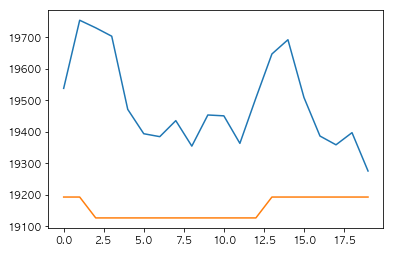

In [18]:
plt.plot(y_test)
plt.plot(y_pred)

In [19]:
X = df[['date', 'ending']]
y = df['ending']

X_train = X[:2600]
y_train = y[:2600]
X_test = X[2600:].reset_index(drop=True)
y_test = y[2600:].reset_index(drop=True)

In [20]:
data = pd.concat([X_train, X_test]).reset_index(drop=True)

In [21]:
data.head()

,date,ending
0,2007-01-04,17353.66
1,2007-01-05,17091.58
2,2007-01-06,17237.76
3,2007-01-07,16942.40
4,2007-01-08,16838.16


In [44]:
ntrain = 2600
ntest = 20

for d in range(ntest):
    for lag in range(1, 3):
        feat_name = 'day_lag'+ str(lag) + '_day' + str(d)
        df = pd.DataFrame({
            'date': data['date'] + pd.DateOffset(lag+d),
            'ending_' + feat_name: data['ending']
        })
        df = pd.merge(data, df, on=['date'], how='left')
        train = pd.DataFrame(df['ending_' + feat_name])[:ntrain]
        test = pd.DataFrame(df['ending_' + feat_name])[ntrain:].reset_index(drop=True)
        train.to_feather(f'features/{feat_name}_train.feather')
        test.to_feather(f'features/{feat_name}_test.feather')

In [45]:
import feather


def load_datasets(feats):
    dfs = [feather.read_dataframe(f'features/{f}_train.feather') for f in feats]
    X_train = pd.concat(dfs, axis=1)
    dfs = [feather.read_dataframe(f'features/{f}_test.feather') for f in feats]
    X_test = pd.concat(dfs, axis=1)
    return X_train, X_test

feats = [
    'day_lag1_day0',
    'day_lag2_day0'
]

In [46]:
feather_train, feather_test = load_datasets(feats)

In [47]:
feather_train.head()

,ending_day_lag1_day0,ending_day_lag2_day0
0,NaN,NaN
1,17353.66,NaN
2,17091.58,17353.66
3,17237.76,17091.58
4,16942.40,17237.76


In [48]:
pd.concat([X_train, feather_train], axis=1).head()

,date,ending,ending_day_lag1_day0,ending_day_lag2_day0
0,2007-01-04,17353.66,NaN,NaN
1,2007-01-05,17091.58,17353.66,NaN
2,2007-01-06,17237.76,17091.58,17353.66
3,2007-01-07,16942.40,17237.76,17091.58
4,2007-01-08,16838.16,16942.40,17237.76
